In [19]:
# fill this up with imports for pandas, numpy, matplotlib, seaborn, etc.
# naive bayes, logistic regression, decision tree, random forest, svm, knn, xgboost, lightgbm, catboost
import pandas as pd
import numpy as np
from numpy import array
import torch
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pickle

In [20]:
!pwd

/media/csuser/DATA/ARTEMIS/yale


In [21]:
data = pd.read_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv', sep=',')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589260 entries, 0 to 589259
Columns: 208 entries, triage_vital_temp to esi
dtypes: float64(208)
memory usage: 935.1 MB


# Visualize

In [23]:
data.keys()
new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr',
       'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'age','esi']

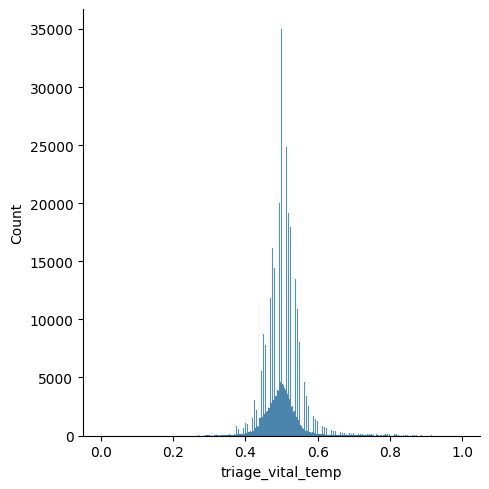

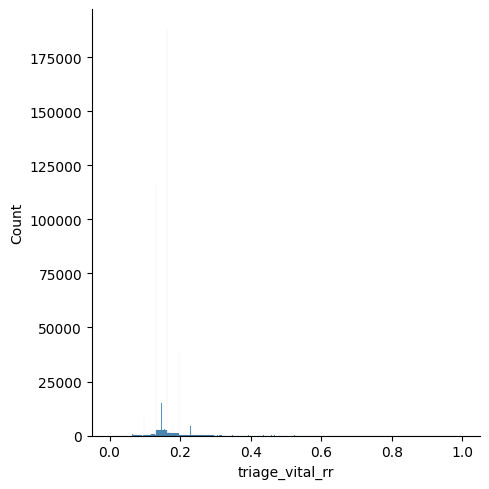

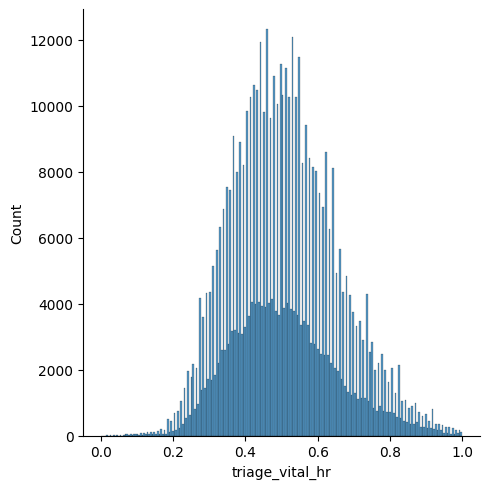

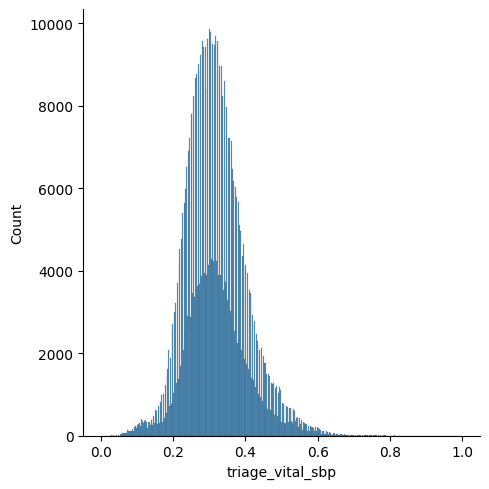

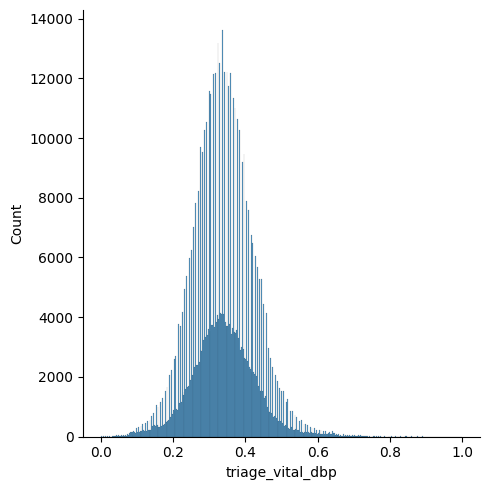

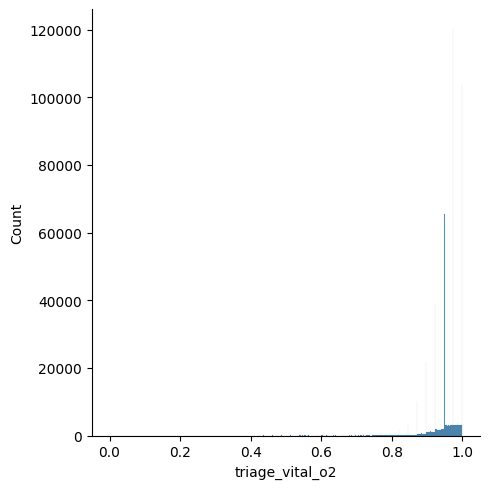

In [24]:
sns.displot(data=data["triage_vital_temp"],rug=False)
sns.displot(data=data["triage_vital_rr"],rug=False)
sns.displot(data=data["triage_vital_hr"],rug=False)
sns.displot(data=data["triage_vital_sbp"],rug=False)
sns.displot(data=data["triage_vital_dbp"],rug=False)
sns.displot(data=data["triage_vital_o2"],rug=False)
plt.show()

# Train

In [25]:
x = data.drop('esi', axis=1)
y = data['esi']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
y_test = y_test.to_numpy()
x.head()

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# create a Gaussian Naive Bayes model
model = GaussianNB()

# fit the model to the training data
history = (model.fit(X_train, y_train))

In [36]:
y_pred = model.predict(X_test)
print(type(y_test))
print(type(y_pred))
print(y_test, y_pred)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[5. 5. 1. ... 2. 5. 2.] [1. 5. 1. ... 1. 5. 1.]


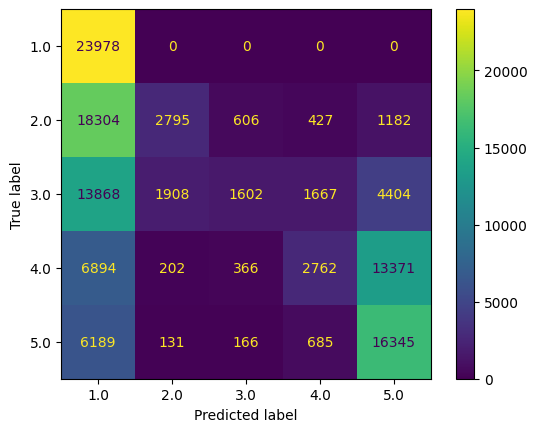

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/NaiveBayes_confusion_yale_smote.png', dpi=300)

In [40]:
TP = np.zeros(5)
FP = np.zeros(5)
FN = np.zeros(5)

for i in range(5):
    for j in range(len(y_test)):
        
        if int(y_test[j]) == i+1 and int(y_pred[j]) == i+1:
            TP[i] += 1
        elif int(y_test[j]) == i+1 and int(y_pred[j]) != i+1:
            FN[i] += 1
        elif int(y_test[j]) != i+1 and int(y_pred[j]) == i+1:
            FP[i] += 1
print(TP, FN, FP)

# Precision or positive predictive value
PPV = np.zeros(5)
for i in range(5):
    if TP[i]+FP[i] != 0:
        PPV[i] = TP[i]/(TP[i]+FP[i])

# Sensitivity, hit rate, recall, or true positive rate
TPR = np.zeros(5)
for i in range(len(TP)):
    if TP[i]+FN[i] != 0:
        TPR[i] = TP[i]/(TP[i]+FN[i])

# Overall accuracy
ACC = np.zeros(5)
class_totals = np.zeros(5)
for i in range(5):
    for j in range(len(y_test)):
        class_totals[int(y_test[j])-1] += 1
        if int(y_test[j]) == int(y_pred[j]):
            ACC[int(y_test[j])-1] += 1
ACC /= class_totals

# F1
F1 = 2 * (PPV * TPR) / (PPV + TPR)

print(PPV, TPR, F1, ACC)

[23978.  2795.  1602.  2762. 16345.] [    0. 20519. 21847. 20833.  7171.] [45255.  2241.  1138.  2779. 18957.]
[0.34633773 0.55500397 0.58467153 0.49846598 0.46300493] [1.         0.11988505 0.06831848 0.1170587  0.69505868] [0.51448863 0.19717813 0.12234144 0.18959363 0.55578224] [1.         0.11988505 0.06831848 0.1170587  0.69505868]


In [30]:
# predict and calculate scores
accuray = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuray)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.4028951566371381
Precision: 0.48877524487051704
Recall: 0.4028951566371381


In [31]:
with open('/media/csuser/DATA/ARTEMIS/models/NaiveBayes_yale_smote.pickle', 'wb') as f:
    pickle.dump(model, f)